
# Credit Card Approval project

## 1. Data Description

### 1.1 Introduction

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.




### 1.2 Data source and data set

Data set link : https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv

## 2. Load the Packages and Data

In [1]:
#Import library and module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
%matplotlib inline

In [2]:
import csv
#Read the dataframe
credit = pd.read_csv("C:\Project\credit_record.csv")
application = pd.read_csv(r"C:\Project\application_record.csv")

## 3.Data Profiling ( Data Exploration)

### 3.1 Understanding the Dataset (Basic information about dataset)


In [3]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
application.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [6]:
application.shape


(438557, 18)

In [7]:
credit.shape

(1048575, 3)

In [8]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
application.size

7894026

In [10]:
application.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [11]:
application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [12]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [13]:
application.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [14]:
application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

## 3.2 Data Preparation(Data Cleaning)

- Check missing values
- Fill null values

In [15]:
application.isnull()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
438553,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
438554,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
438555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [16]:
missing = application.isnull().sum()
missing

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [17]:
# Show in percentage
missing1 = application.isnull().sum()/len(application)*100
missing1

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [18]:
## making a copy of dataset for changes
application_copy = application.copy()
application_copy.shape

(438557, 18)

In [19]:
#application_copy = application_copy.dropna(how='any',subset=['OCCUPATION_TYPE'])


In [20]:
application = application.fillna(value="missing")
application.shape

(438557, 18)

In [21]:
#Check duplicate rows
credit[credit.duplicated()].sum()

ID                0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [22]:
application[application.duplicated()].sum()

ID                     0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_BIRTH             0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
OCCUPATION_TYPE        0.0
CNT_FAM_MEMBERS        0.0
dtype: float64

In [23]:
#Drop column ID


In [24]:
#Replace categorical values with numerics values 
application_copy = pd.get_dummies(application_copy, sparse=True)
application_copy

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,135000.0,-22717,365243,1,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
438553,6840222,0,103500.0,-15939,-3007,1,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0
438554,6841878,0,54000.0,-8169,-372,1,1,0,0,1.0,...,0,0,0,0,0,0,1,0,0,0
438555,6842765,0,72000.0,-21673,365243,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0


### Merge two dataset base on ID

In [25]:
application_copy2 = application.copy()

In [26]:
dataset = credit.merge(application_copy2, how="inner", on='ID')

In [27]:
dataset.drop("ID", axis=1,inplace=True)

In [28]:
dataset

,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
1,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
2,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
3,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
4,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777711,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777712,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777713,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [29]:
dataset.drop_duplicates(inplace=True)
dataset

,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
1,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
2,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
3,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
4,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777711,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777712,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777713,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468925 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTHS_BALANCE       468925 non-null  int64  
 1   STATUS               468925 non-null  object 
 2   CODE_GENDER          468925 non-null  object 
 3   FLAG_OWN_CAR         468925 non-null  object 
 4   FLAG_OWN_REALTY      468925 non-null  object 
 5   CNT_CHILDREN         468925 non-null  int64  
 6   AMT_INCOME_TOTAL     468925 non-null  float64
 7   NAME_INCOME_TYPE     468925 non-null  object 
 8   NAME_EDUCATION_TYPE  468925 non-null  object 
 9   NAME_FAMILY_STATUS   468925 non-null  object 
 10  NAME_HOUSING_TYPE    468925 non-null  object 
 11  DAYS_BIRTH           468925 non-null  int64  
 12  DAYS_EMPLOYED        468925 non-null  int64  
 13  FLAG_MOBIL           468925 non-null  int64  
 14  FLAG_WORK_PHONE      468925 non-null  int64  
 15  FLAG_PHONE       

# 4.EDA Questions

In [31]:
application_copy.drop("FLAG_MOBIL",axis=1,inplace=True)

In [32]:
application_copy

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,5008805,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,5008806,0,112500.0,-21474,-1134,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,-19110,-3051,0,1,1,1.0,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,-19110,-3051,0,1,1,1.0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,135000.0,-22717,365243,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
438553,6840222,0,103500.0,-15939,-3007,0,0,0,1.0,1,...,1,0,0,0,0,0,0,0,0,0
438554,6841878,0,54000.0,-8169,-372,1,0,0,1.0,1,...,0,0,0,0,0,0,1,0,0,0
438555,6842765,0,72000.0,-21673,365243,0,0,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
application_copy.nunique()

ID                                                   438510
CNT_CHILDREN                                             12
AMT_INCOME_TOTAL                                        866
DAYS_BIRTH                                            16379
DAYS_EMPLOYED                                          9406
FLAG_WORK_PHONE                                           2
FLAG_PHONE                                                2
FLAG_EMAIL                                                2
CNT_FAM_MEMBERS                                          13
CODE_GENDER_F                                             2
CODE_GENDER_M                                             2
FLAG_OWN_CAR_N                                            2
FLAG_OWN_CAR_Y                                            2
FLAG_OWN_REALTY_N                                         2
FLAG_OWN_REALTY_Y                                         2
NAME_INCOME_TYPE_Commercial associate                     2
NAME_INCOME_TYPE_Pensioner              

<Axes: >

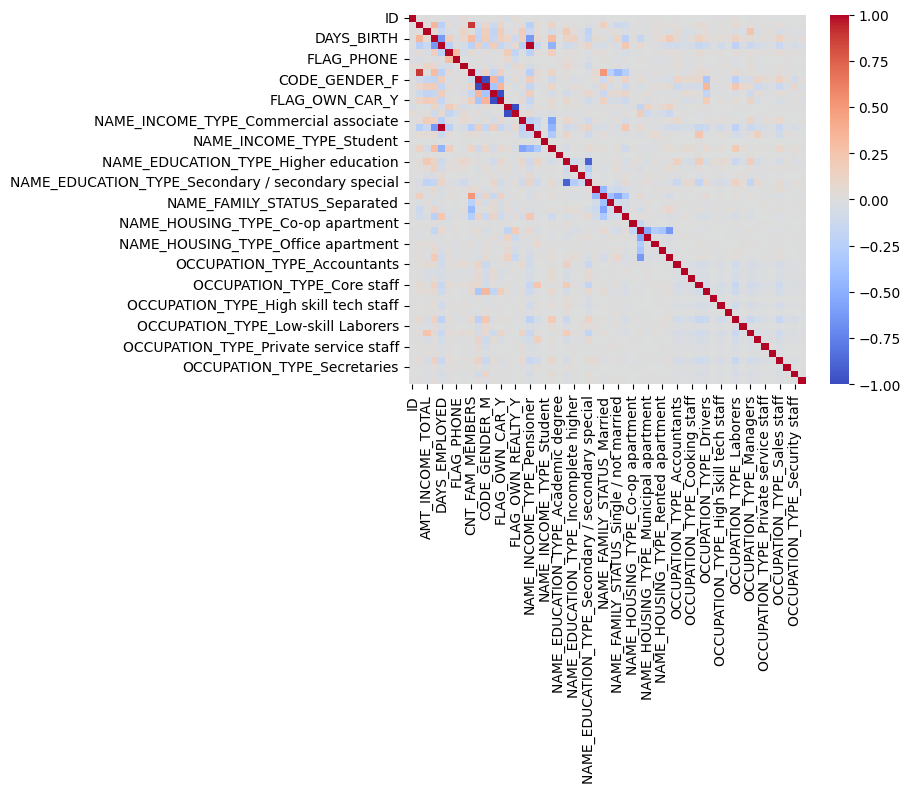

In [34]:
sns.heatmap(application_copy.corr(),cmap="coolwarm",vmin=-1,vmax=1)

In [35]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,missing,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,missing,2.0


## Propotion of name income type

In [36]:
application['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [37]:
application['NAME_INCOME_TYPE'].value_counts()/len(application)*100

Working                 51.556354
Commercial associate    22.974665
Pensioner               17.213954
State servant            8.251151
Student                  0.003876
Name: NAME_INCOME_TYPE, dtype: float64

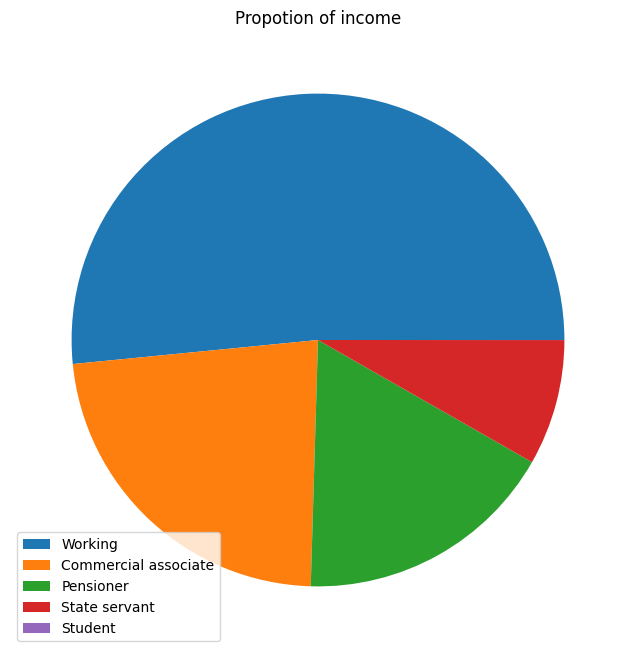

In [38]:
plt.figure(figsize=(8,8))
plt.pie(application['NAME_INCOME_TYPE'].value_counts())
plt.title("Propotion of income")
plt.legend(application['NAME_INCOME_TYPE'].value_counts().index)

The propotion of student in the data is not countable

## Amt Income Total Group

In [39]:
application['AMT_INCOME_TOTAL'].max()

6750000.0

In [40]:
application['AMT_INCOME_TOTAL'].min()

26100.0

In [41]:
queue = [application['AMT_INCOME_TOTAL'].min()]
for i in range(1,6):
    count = application['AMT_INCOME_TOTAL'].min() + i/5*(application['AMT_INCOME_TOTAL'].max() - application['AMT_INCOME_TOTAL'].min())
    queue.append(count)
queue

[26100.0, 1370880.0, 2715660.0, 4060440.0, 5405220.0, 6750000.0]

In [42]:
queue[0], queue[1]

(26100.0, 1370880.0)

In [43]:
group1=application['AMT_INCOME_TOTAL'][application['AMT_INCOME_TOTAL']>queue[0]][application['AMT_INCOME_TOTAL']<queue[1]].value_counts()

In [44]:
application['AMT_INCOME_TOTAL']

0         427500.0
1         427500.0
2         112500.0
3         270000.0
4         270000.0
            ...   
438552    135000.0
438553    103500.0
438554     54000.0
438555     72000.0
438556    121500.0
Name: AMT_INCOME_TOTAL, Length: 438557, dtype: float64

In [45]:
len(group1)

854

In [46]:
group2=application['AMT_INCOME_TOTAL'][application['AMT_INCOME_TOTAL']>queue[1]][application['AMT_INCOME_TOTAL']<queue[2]].value_counts()
group3=application['AMT_INCOME_TOTAL'][application['AMT_INCOME_TOTAL']>queue[2]][application['AMT_INCOME_TOTAL']<queue[3]].value_counts()
group4=application['AMT_INCOME_TOTAL'][application['AMT_INCOME_TOTAL']>queue[3]][application['AMT_INCOME_TOTAL']<queue[4]].value_counts()
group5=application['AMT_INCOME_TOTAL'][application['AMT_INCOME_TOTAL']>queue[4]]

In [47]:
gomnhom=[len(group1),len(group2),len(group3),len(group4),len(group5)]

In [48]:
#plt.figure(figsize=(4,10))
#sns.countplot(x=['1','2','3','4','5'],y=gomnhom)

In [49]:
gomnhom

[854, 5, 4, 1, 7]

## 4.3 Housing type distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

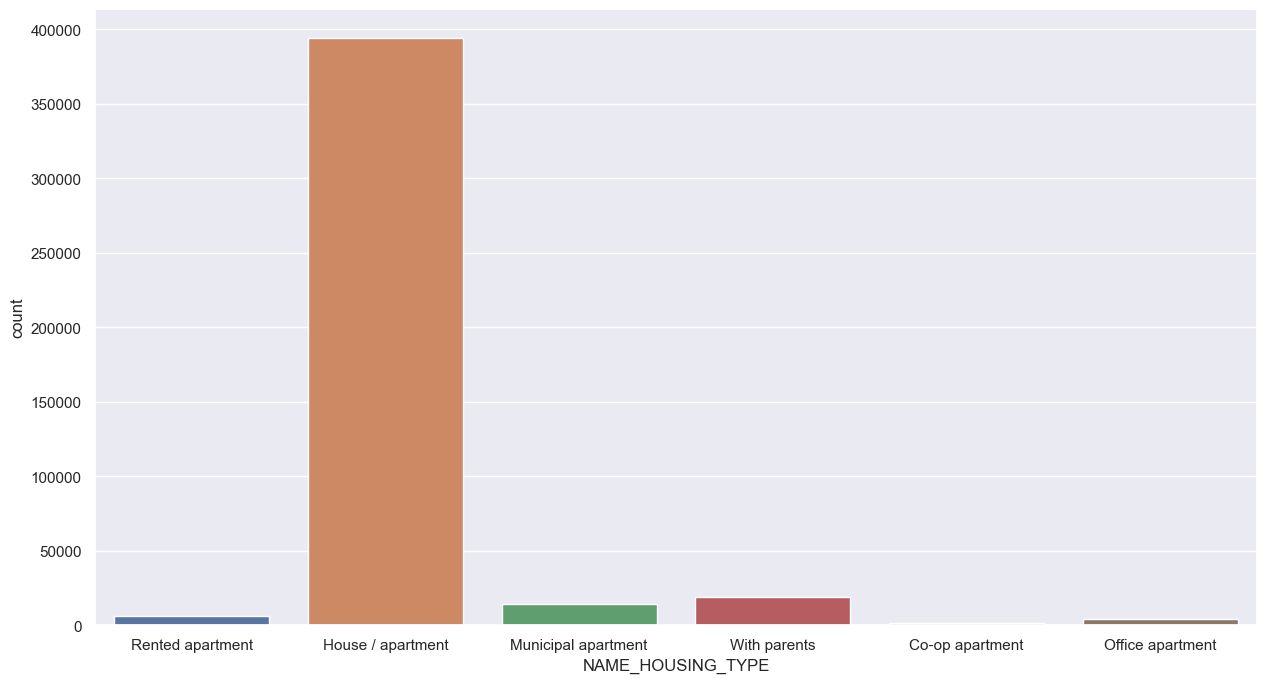

In [50]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(application["NAME_HOUSING_TYPE"],)

Most of the customers have a house/ an apartment

### 4.4 What is the correlation between the attributes?

In [51]:
#sns.pairplot(data=application)

In [52]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### 4.5 Family members distribution 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='count'>

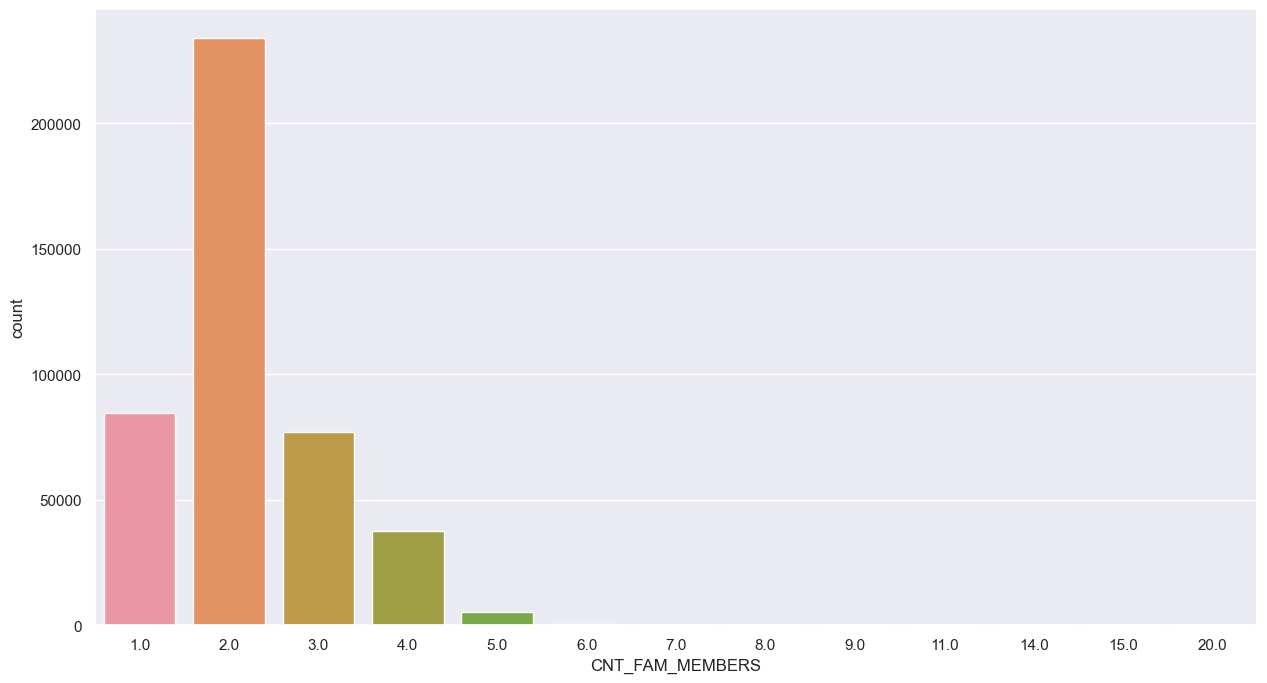

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(application["CNT_FAM_MEMBERS"],)

In [54]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,missing,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,missing,2.0


### 4.6 Employed and unemployed rate?

In [55]:
employed =[]
unemployed=[]
for i in application["DAYS_EMPLOYED"]:
    if i >= 0:
        unemployed.append(i)
    else:
        employed.append(i)
    


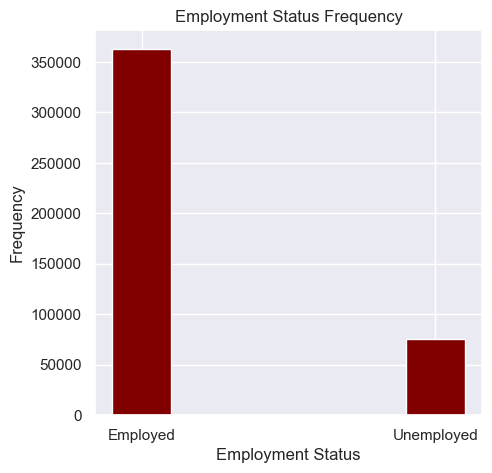

In [56]:
data = {'Employed':363228, 'Unemployed':75329
        }
fig = plt.figure(figsize = (5, 5))
employment = list(data.keys())
values = list(data.values()) 
# creating the bar plot
plt.bar(employment, values, color ='maroon',
        width = 0.2)

plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.title("Employment Status Frequency")
plt.show()

# Predict

### Prepare the data

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
#Creating the target column
credit.replace(['X','C'], 0,inplace=True)
credit.STATUS = pd.to_numeric(credit.STATUS)
drop_ls = []
for i in range(len(credit)):
    if credit.STATUS[i] != 0:
        drop_ls.append(credit.ID[i])

In [59]:
len(drop_ls)

14194

In [60]:
# Changing the STATUS of any client with at least one late month to 1
for i in range(len(credit)):
        if credit.ID[i] in drop_ls:
            credit.STATUS[i] = 1

In [61]:
credit.drop_duplicates(inplace=True)
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [62]:
credit.STATUS.value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3          0
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: STATUS, Length: 1048575, dtype: int64>

In [63]:
#dataset.replace(['X', 'C'], value=-1, inplace=True)
dataset.OCCUPATION_TYPE.replace(np.nan, 'Other', inplace = True)

In [64]:
#dataset.STATUS.unique()
#dataset.STATUS = dataset.STATUS.astype('int32')

In [65]:
dataset.head()

,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
1,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
2,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
3,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
4,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0


### Label Encoding

In [66]:
import sklearn

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = le.fit_transform(dataset[col])

In [69]:
dataset.drop_duplicates(inplace=True)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = dataset.drop('STATUS', axis=1)
y = dataset.STATUS

In [72]:
#from sklearn.preprocessing import normalize

In [73]:
#transform = sklearn.preprocessing.MinMaxScaler()

In [74]:
#transform.fit(X)

In [75]:
#X = transform.transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
X_train.shape, X_test.shape

((375140, 18), (93785, 18))

In [78]:
#from sklearn.ensemble import RandomForestClassifier
#rd = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight='balanced',max_depth=48,splitter='best',random_state=42,min_samples_split=48)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=48,
                       min_samples_split=48, random_state=42)

In [79]:
#rd.fit(X_train, y_train)
DecisionTreeClassifier(class_weight='balanced', max_depth=48,
                       min_samples_split=48, random_state=42)

DecisionTreeClassifier(class_weight='balanced', max_depth=48,
                       min_samples_split=48, random_state=42)

In [80]:
#result = rd.predict(X_test)
#result
y_pred = classifier.predict(X_test)

In [81]:
y_pred_train= classifier.predict(X_train)

In [82]:
result = classifier.predict(X_test)

## Calculating Scores

In [83]:
sklearn.metrics.accuracy_score(y_true=y_test, y_pred=result)


0.4583035666684438

In [84]:
print(sklearn.metrics.classification_report(y_true=y_test, y_pred=result))

              precision    recall  f1-score   support

           0       0.61      0.35      0.44     37323
           1       0.07      0.52      0.12      1679
           2       0.02      0.27      0.04       166
           3       0.00      0.08      0.01        49
           4       0.01      0.17      0.02        47
           5       0.21      0.73      0.32       260
           6       0.60      0.49      0.54     34436
           7       0.44      0.60      0.51     19825

    accuracy                           0.46     93785
   macro avg       0.25      0.40      0.25     93785
weighted avg       0.56      0.46      0.48     93785



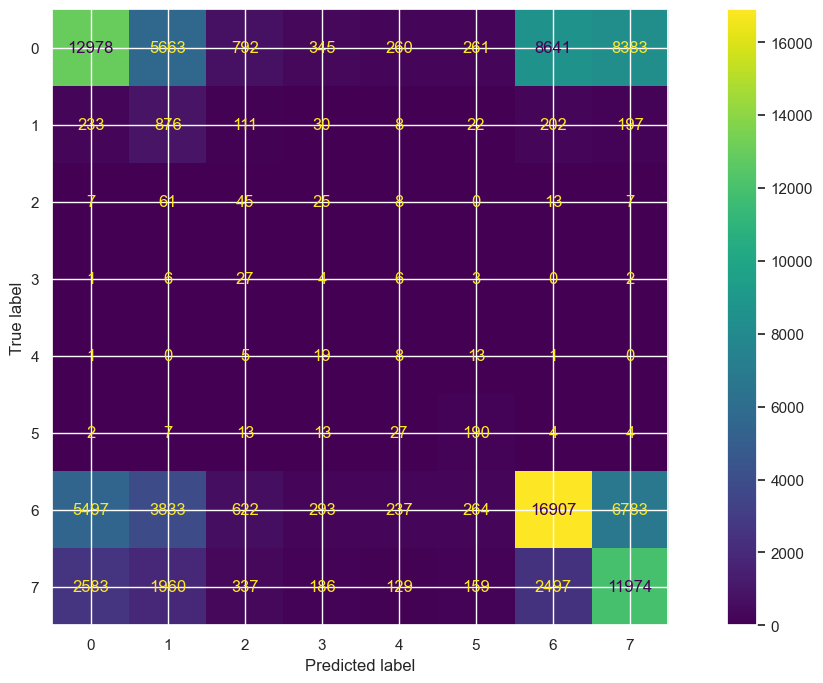

In [85]:
cfm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=result)
disp = sklearn.metrics.ConfusionMatrixDisplay(cfm)
disp.plot()

In [86]:
%matplotlib inline

In [87]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight='balanced',max_depth=48,splitter='best',random_state=42,min_samples_split=48)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=48,
                       min_samples_split=48, random_state=42)

In [88]:
result = classifier.predict(X_test)
result

array([0, 6, 6, ..., 0, 7, 0])

In [89]:
sklearn.metrics.accuracy_score(y_true=y_test, y_pred=result)

0.4583035666684438